Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Esmee Voulon, #2003799#"
COLLABORATORS = ""

---

Fill in the cell above to provide us with your name and student number, like

NAME = "Adam Smith, #student number#"

where you replace "#student number#" with your ... (very good!)

Unfortunately, you are not allowed to work with "COLLABORATORS" in this exam.

# exam October 16th, 2018

With this python part of the exam you can earn at max. 4 points.




In the first cell of the notebook, give us your name and student number in the way indicated above. 

Fill in the notebook (see below for code cells and text cells that you need to fill in).

If you look at the menus above (File, Edit, View etc.), there is one called "Cell". If you click on this, you can change the "Cell Type". Choose "Code" when you are typing python or R code. Choose "Markdown" when you are typing, well, markdown.

When you finish the notebook, make sure that you **save it with the output of your code included**. 

Then put it on github, e.g. by dragging it onto github (see instructions below). 

Finally, add a link to your README file with the name of this exam: "Exam October 16, 2018".



## Competition and number of firms

We start by importing the usual libraries.

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import optimize
%matplotlib inline

We consider a market with $n$ firms where $n$ can vary. The (inverse) demand function on this market is given by $p(Q)=1-Q$ and firms produce with the same cost function: $c(q)=0.1q$. 

In [3]:
def p(Q):
    return 1-Q

def c(q):
    return 0.1*q

#### a) [0.5 points] Explain in words what the following code does. In particular, why is this the best response of a firm if its competitors produce $Q$ in total? What does "0,1" at the end of the `fminbound` statement mean?

In [4]:
def Best_response(Q):
    q = optimize.fminbound(lambda x: -(p(x+Q)*x-c(x)),0,1)
    return q

The code gives the amount that a firm should produce (their best response). The function optimize.fminbound gives the bounded minimization for scalar functions. Therefore there stands a - in front of the (p(x+Q)*x-c(x)), so that it will result in an optimum instead of a minimun. The "0,1" means that the bounderies for the amount of q are between 0 and 1.

In [51]:
print(q)

[0.9        0.45       0.3        0.225      0.18       0.15
 0.12857143 0.1125     0.1        0.09       0.08181818 0.075
 0.06923077 0.06428571 0.06       0.05625    0.05294118 0.05
 0.04736842 0.045      0.04285714 0.04090909 0.03913043 0.0375
 0.036      0.03461538 0.03333333 0.03214286 0.03103448 0.03
 0.02903226 0.028125   0.02727273 0.02647059 0.02571429 0.025
 0.02432432 0.02368421 0.02307692 0.0225     0.02195122 0.02142857
 0.02093023 0.02045455 0.02       0.01956522 0.01914894 0.01875
 0.01836735 0.018      0.01764706 0.01730769 0.01698113 0.01666667
 0.01636364 0.01607143 0.01578947 0.01551724 0.01525424 0.015
 0.0147541  0.01451613 0.01428571 0.0140625  0.01384615 0.01363636
 0.01343284 0.01323529 0.01304348 0.01285714 0.01267606 0.0125
 0.01232877 0.01216216 0.012      0.01184211 0.01168831 0.01153846
 0.01139241 0.01125    0.01111111 0.01097561 0.01084337 0.01071429
 0.01058824 0.01046512 0.01034483 0.01022727 0.01011236 0.01
 0.00989011 0.00978261 0.00967742 0.00957447 

The following cell calculates the fixed point for a symmetric equilibrium: if each firm produces $q$ then $q$ should be the best respons to the other firms producing $Q=(n-1)q$ together.

In [5]:
def fixed_point(q,n):
    return q-Best_response((n-1)*q)

#### b) [1 point] Define a function `output(n)` that gives each firm's output level as a function of the number of firms in the market.

[hint: you need to "solve" `fixed_point` as a function of `q`, for a given `n`; use one of the numerical solvers that we used in class]

In [6]:
def output(n):
    return 

In [52]:
from scipy import optimize
from scipy.optimize import fsolve
x = fsolve(fixed_point, 1.0)

TypeError: fixed_point() missing 1 required positional argument: 'n'

In [58]:
def findIntersection(fixed_point, Best_response,):
    return [fsolve(lambda x:fixed_point(x)-Best_response(Q))]

print (findIntersection(fixed_point, Best_response(Q) 

SyntaxError: unexpected EOF while parsing (<ipython-input-58-24a6a96793da>, line 4)

If you cannot solve b) then use the following function for the remainder of this exam:

`def output(n):
    return 0.9/n`

#### c) [0.5 points] Explain line by line what the following code does. 

[hint: do not worry if you get a "RuntimeWarning"]

In [9]:
def output(n):
    return 0.9/n

In [10]:
range_n = np.arange(1,101,1)
outputs = [output(n) for n in range_n]

df = pd.DataFrame({'n':range_n, 'q':outputs})

range_n = np.arange(1,101,1) gives the interval from 1 to 100 with a step of 1 (1 is the start of the interval and 100 is the stop of the interval, because the last step of 1 isn't in the stop part you have to put stop to a value of 101 so that it will give the interval to 100). So it gives that the range of n (the range of how many firms are in the market) is between 1 and 100 with a step of 1 (firm).

outputs = [output(n) for n in range_n] gives the outputs for all outcomes of output(n): 
                                                                                return 0.9/n    for all n between 0 and 100

df = pd.DataFrame({'n':range_n, 'q':outputs}) gives the amount of q given a number of n. So it gives the amount that each firm produces when there are n firms in the market.


In [13]:
print(outputs)

[0.9, 0.45, 0.3, 0.225, 0.18, 0.15, 0.1285714285714286, 0.1125, 0.1, 0.09, 0.08181818181818182, 0.075, 0.06923076923076923, 0.0642857142857143, 0.060000000000000005, 0.05625, 0.052941176470588235, 0.05, 0.04736842105263158, 0.045, 0.04285714285714286, 0.04090909090909091, 0.0391304347826087, 0.0375, 0.036000000000000004, 0.03461538461538462, 0.03333333333333333, 0.03214285714285715, 0.03103448275862069, 0.030000000000000002, 0.02903225806451613, 0.028125, 0.027272727272727275, 0.026470588235294117, 0.025714285714285714, 0.025, 0.024324324324324326, 0.02368421052631579, 0.023076923076923078, 0.0225, 0.021951219512195124, 0.02142857142857143, 0.020930232558139535, 0.020454545454545454, 0.02, 0.01956521739130435, 0.019148936170212766, 0.01875, 0.018367346938775512, 0.018000000000000002, 0.01764705882352941, 0.01730769230769231, 0.016981132075471698, 0.016666666666666666, 0.016363636363636365, 0.016071428571428573, 0.015789473684210527, 0.015517241379310345, 0.015254237288135594, 0.0150000

In [39]:
print(df)

      n         q
0     1  0.900000
1     2  0.450000
2     3  0.300000
3     4  0.225000
4     5  0.180000
5     6  0.150000
6     7  0.128571
7     8  0.112500
8     9  0.100000
9    10  0.090000
10   11  0.081818
11   12  0.075000
12   13  0.069231
13   14  0.064286
14   15  0.060000
15   16  0.056250
16   17  0.052941
17   18  0.050000
18   19  0.047368
19   20  0.045000
20   21  0.042857
21   22  0.040909
22   23  0.039130
23   24  0.037500
24   25  0.036000
25   26  0.034615
26   27  0.033333
27   28  0.032143
28   29  0.031034
29   30  0.030000
..  ...       ...
70   71  0.012676
71   72  0.012500
72   73  0.012329
73   74  0.012162
74   75  0.012000
75   76  0.011842
76   77  0.011688
77   78  0.011538
78   79  0.011392
79   80  0.011250
80   81  0.011111
81   82  0.010976
82   83  0.010843
83   84  0.010714
84   85  0.010588
85   86  0.010465
86   87  0.010345
87   88  0.010227
88   89  0.010112
89   90  0.010000
90   91  0.009890
91   92  0.009783
92   93  0.009677
93   94  0

In [30]:
n = range_n
q = output(n)

#### d) [0.5 points] Plot output per firm $q$ as a function of the number of firms $n$. Put labels on both the horizontal and vertical axes to explain what they show.

Text(0.5,1,'output level of each firm as a funtion of the number of firms in the market')

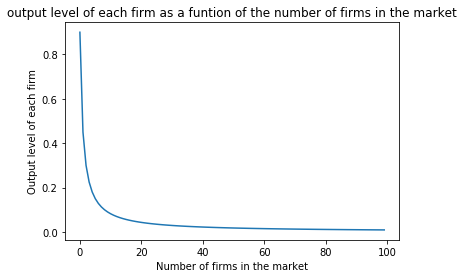

In [46]:
plt.plot(0.9/n)
plt.xlabel('Number of firms in the market')
plt.ylabel('Output level of each firm')
plt.title('output level of each firm as a funtion of the number of firms in the market')

#### e) [0.5 point] Create two new columns for the dataframe `df`: (i) a column `Q` with total equilibrium output in the industry $Q=n*q$ and (ii) a column `p` with the equilibrium price.

In [45]:
Q = n*q

df = pd.DataFrame({'n':range_n, 'q':outputs, 'Q':n*q, 'p':p(Q)/n})

print(df)

      Q    n         p         q
0   0.9    1  0.100000  0.900000
1   0.9    2  0.050000  0.450000
2   0.9    3  0.033333  0.300000
3   0.9    4  0.025000  0.225000
4   0.9    5  0.020000  0.180000
5   0.9    6  0.016667  0.150000
6   0.9    7  0.014286  0.128571
7   0.9    8  0.012500  0.112500
8   0.9    9  0.011111  0.100000
9   0.9   10  0.010000  0.090000
10  0.9   11  0.009091  0.081818
11  0.9   12  0.008333  0.075000
12  0.9   13  0.007692  0.069231
13  0.9   14  0.007143  0.064286
14  0.9   15  0.006667  0.060000
15  0.9   16  0.006250  0.056250
16  0.9   17  0.005882  0.052941
17  0.9   18  0.005556  0.050000
18  0.9   19  0.005263  0.047368
19  0.9   20  0.005000  0.045000
20  0.9   21  0.004762  0.042857
21  0.9   22  0.004545  0.040909
22  0.9   23  0.004348  0.039130
23  0.9   24  0.004167  0.037500
24  0.9   25  0.004000  0.036000
25  0.9   26  0.003846  0.034615
26  0.9   27  0.003704  0.033333
27  0.9   28  0.003571  0.032143
28  0.9   29  0.003448  0.031034
29  0.9   

#### f) [0.5 points] Make a new plot, this time with price as a function of the number of firms.

Text(0.5,1,'Equilibrium price as a function of number of firms in the market')

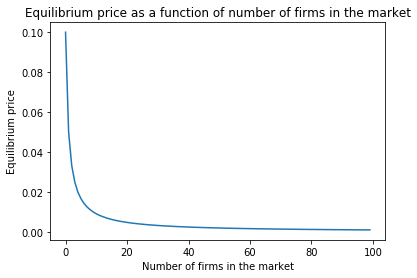

In [38]:
plt.plot(p(Q)/n)
plt.xlabel('Number of firms in the market')
plt.ylabel('Equilibrium price')
plt.title('Equilibrium price as a function of number of firms in the market')

#### g) [0.5 points] As the number of firms becomes larger (goes to infinity) to which value does $p$ converge? Why is this the case; i.e. what is the *economic* intuition for this?

If the number of firms becomes larger (goes to infinity) than the value of p will converge to 0. As more and more firms will produce the lower the price will be. More supply and the same demand will lead to a lower price. If the number of firms goes to infinity the supply will get so big that the price (p) will converge to 0.

## Github

After you have finished, we need to upload this notebook on github.

Instructions on how to upload this on github can be found [on this page](http://janboone.github.io/programming-for-economists/github.html). This page has two screencasts: one shows how to drag the notebook onto your github page, the other shows how you can use the command line to upload your notebook.


Remember to update the README file in your repository to include a link to this notebook on github.


The links that you should post start with “github.com/” and are NOT of the form “http://localhost”. Make sure you test your links after uploading.